**Importing** **Libaries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings("ignore")

**Reading** **the** **dataset**

In [ ]:
data = pd.read_csv('Groceries_dataset.csv')


In [ ]:
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


**EDA**

In [ ]:
# Get the top 20 most frequently occurring values
x = data['itemDescription'].value_counts().sort_values(ascending=False)[:20]

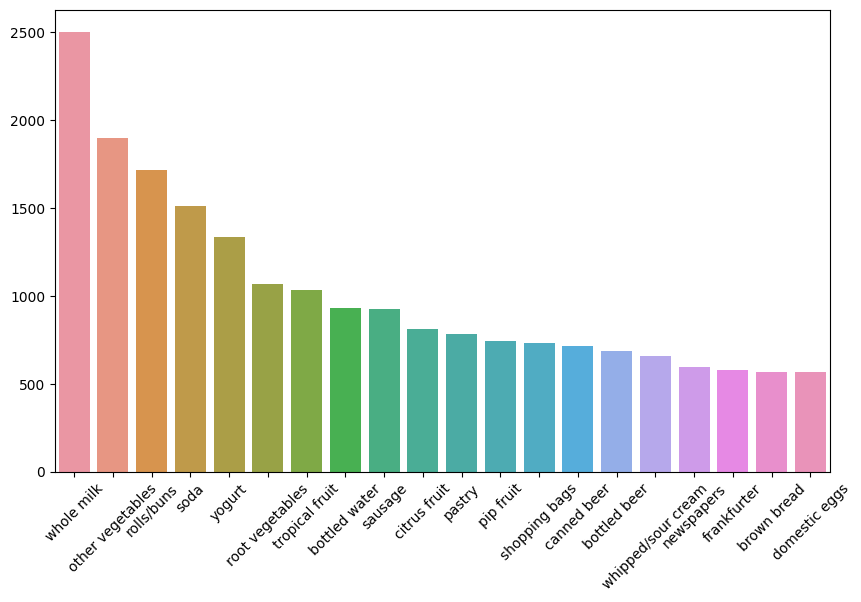

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=x.index, y=x.values)
plt.xticks(rotation=45)
plt.show()

**Apriori** **Algorithm**

In [ ]:
data['Quantity'] = 1

In [ ]:
data


,Member_number,Date,itemDescription,Quantity
0,1808,21-07-2015,tropical fruit,1
1,2552,05-01-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1
3,1187,12-12-2015,other vegetables,1
4,3037,01-02-2015,whole milk,1
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,1
38761,2022,23-02-2014,candy,1
38762,1097,16-04-2014,cake bar,1
38763,1510,03-12-2014,fruit/vegetable juice,1


In [ ]:
transactions =  data.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')


In [ ]:
transactions = transactions.fillna(0)

In [ ]:
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode(x):
    if x <=0:
        return 0
    elif x>=0:
        return 1

In [ ]:
basket = transactions.applymap(encode)
basket


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [ ]:
frequent_itemset = apriori(basket, min_support=0.06, use_colnames=True)
rules = association_rules(frequent_itemset, metric='lift', min_threshold=1)


In [ ]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
1,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,0.009360,1.023754,0.269364
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
3,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,0.008692,1.028212,0.203563
4,(bottled beer),(rolls/buns),0.158799,0.349666,0.063109,0.397415,1.136555,0.007582,1.079240,0.142829


In [ ]:
confidence_threshold = 0.4
lift_threshold = 1
rules[(rules['confidence'] > confidence_threshold) & (rules['lift'] > lift_threshold)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
6,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297
8,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969,0.181695
14,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
18,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,0.007481,1.113034,0.124087
20,(butter),(whole milk),0.126475,0.458184,0.066188,0.523327,1.142176,0.008239,1.136661,0.142501
23,(canned beer),(other vegetables),0.165213,0.376603,0.067214,0.406832,1.080267,0.004994,1.050962,0.089008
25,(canned beer),(rolls/buns),0.165213,0.349666,0.066701,0.403727,1.154605,0.008931,1.090663,0.160404
27,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795,0.158299


**Make** **Recommendation** **on** **Items**


In [ ]:
# recommend items based on single or multiple input item
def recommend_items(items, confidence_threshold=0.4, lift_threshold=1):
    if isinstance(items, str):
        # Select the rules that contain the input item as the antecedent and have a confidence greater than the threshold
        recommendations = rules.loc[(rules['antecedents'] == {items}) & (rules['confidence'] > confidence_threshold) & (rules['lift'] > lift_threshold)]
    if isinstance(items, list):
        recommendations = rules.loc[(rules['antecedents'].apply(lambda x: any(item in x for item in items))) & (rules['confidence'] > confidence_threshold)]
    # Extract the consequents of the selected rules as the recommended items
    recommended_items = recommendations['consequents'].apply(lambda x: list(x)).tolist()
    # Flatten the list of recommended items
    recommended_items = [item for sublist in recommended_items for item in sublist if item not in items]
    return list(set(recommended_items))

In [ ]:
# recommend items for single i/p item
recommend_items("yogurt")


['other vegetables', 'whole milk']

In [ ]:
# recommend items for multiple i/p items
recommend_items(["rolls/buns", "yogurt"])

['other vegetables', 'whole milk']

In [ ]:
recommend_items("canned beer")

['rolls/buns', 'other vegetables', 'whole milk']